In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [11]:
df = pd.read_csv('eplresults.csv')

In [12]:
df.shape

(10734, 23)

In [13]:
df = df.loc[2824:]

In [15]:
df = df.drop(['DateTime','FTR','HTR','Referee', 'HS', 'AS', 'HST', 'AST', 'HC' ,'AC', 'HF' ,'AF', 'HY', 'AY', 'HR' ,'AR'], axis = 1)

In [16]:
df

,Season,HomeTeam,AwayTeam,FTHG,FTAG,HTHG,HTAG
2824,2000-01,Charlton,Man City,4,0,2.0,0.0
2825,2000-01,Chelsea,West Ham,4,2,1.0,0.0
2826,2000-01,Coventry,Middlesbrough,1,3,1.0,1.0
2827,2000-01,Derby,Southampton,2,2,1.0,2.0
2828,2000-01,Leeds,Everton,2,0,2.0,0.0
...,...,...,...,...,...,...,...
10729,2020-21,West Ham,Leicester,3,2,2.0,0.0
10730,2020-21,Tottenham,Man United,1,3,1.0,0.0
10731,2020-21,Sheffield United,Arsenal,0,3,0.0,1.0
10732,2020-21,West Brom,Southampton,3,0,2.0,0.0


In [17]:
df['Score'] = df['FTHG'] + df['FTAG']

In [18]:
conditions = [(df['FTHG'] > df['FTAG']),(df['FTHG'] < df['FTAG'])]
values = [df['HomeTeam'],df['AwayTeam']]
values1 = [df['AwayTeam'],df['HomeTeam']]
df['Final Winner'] = np.select(conditions, values, default='Draw')
df['Final Loser'] = np.select(conditions, values1, default='Draw')

In [19]:
conditions1 = [(df['HTHG'] > df['HTAG']),(df['HTHG'] < df['HTAG'])]
values2 = [df['HomeTeam'],df['AwayTeam']]
values3 = [df['AwayTeam'],df['HomeTeam']]
df['Halftime Winner'] = np.select(conditions1, values2, default='Draw')
df['Halftime Loser'] = np.select(conditions1, values3, default='Draw')

In [21]:
df['Comeback'] = np.where((df['Final Winner'] != df['Halftime Winner'])&(df['Final Winner']!='Draw')&(df['Halftime Winner']!='Draw'),1, 0)

In [22]:
df

,Season,HomeTeam,AwayTeam,FTHG,FTAG,HTHG,HTAG,Score,Final Winner,Final Loser,Halftime Winner,Halftime Loser,Comeback
2824,2000-01,Charlton,Man City,4,0,2.0,0.0,4,Charlton,Man City,Charlton,Man City,0
2825,2000-01,Chelsea,West Ham,4,2,1.0,0.0,6,Chelsea,West Ham,Chelsea,West Ham,0
2826,2000-01,Coventry,Middlesbrough,1,3,1.0,1.0,4,Middlesbrough,Coventry,Draw,Draw,0
2827,2000-01,Derby,Southampton,2,2,1.0,2.0,4,Draw,Draw,Southampton,Derby,0
2828,2000-01,Leeds,Everton,2,0,2.0,0.0,2,Leeds,Everton,Leeds,Everton,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10729,2020-21,West Ham,Leicester,3,2,2.0,0.0,5,West Ham,Leicester,West Ham,Leicester,0
10730,2020-21,Tottenham,Man United,1,3,1.0,0.0,4,Man United,Tottenham,Tottenham,Man United,1
10731,2020-21,Sheffield United,Arsenal,0,3,0.0,1.0,3,Arsenal,Sheffield United,Arsenal,Sheffield United,0
10732,2020-21,West Brom,Southampton,3,0,2.0,0.0,3,West Brom,Southampton,West Brom,Southampton,0


In [23]:
# Games per season
season = df.groupby('Season')['Season'].count()
season = pd.DataFrame(season)
season.columns = ['Games']
season.reset_index(level=0, inplace=True)

In [24]:
# Goals per season
season1 = df.groupby('Season')['Score'].sum()
season1 = pd.DataFrame(season1)
season1.columns = ['Total Goals']
season1.reset_index(level=0, inplace=True)

In [25]:
# Home goals by season
season2 = df.groupby('Season')['FTHG'].sum()
season2 = pd.DataFrame(season2)
season2.columns = ['Home Goals']
season2.reset_index(level=0, inplace=True)

In [26]:
# Away goals by season
season3 = df.groupby('Season')['FTAG'].sum()
season3 = pd.DataFrame(season3)
season3.columns = ['Away Goals']
season3.reset_index(level=0, inplace=True)


In [27]:
# Comebacks per season
season4 = df.groupby('Season')['Comeback'].sum()
season4 = pd.DataFrame(season4)
season4.columns = ['Comeback']
season4.reset_index(level=0, inplace=True)

In [28]:
# Merging dataframes
season = season.merge(season1, how='left', on='Season')
season = season.merge(season2, how='left', on='Season')
season = season.merge(season3, how='left', on='Season')
season = season.merge(season4, how='left', on='Season')

In [29]:
# Goals per game
season['Goals per game'] = round(season['Total Goals']/season['Games'],2)

In [30]:
season

,Season,Games,Total Goals,Home Goals,Away Goals,Comeback,Goals per game
0,2000-01,380,992,587,405,18,2.61
1,2001-02,380,1001,557,444,15,2.63
2,2002-03,380,1000,570,430,16,2.63
3,2003-04,380,1012,572,440,19,2.66
4,2004-05,380,975,570,405,12,2.57
5,2005-06,380,944,555,389,15,2.48
6,2006-07,380,931,552,379,14,2.45
7,2007-08,380,1002,581,421,17,2.64
8,2008-09,380,942,532,410,16,2.48
9,2009-10,380,1053,645,408,17,2.77


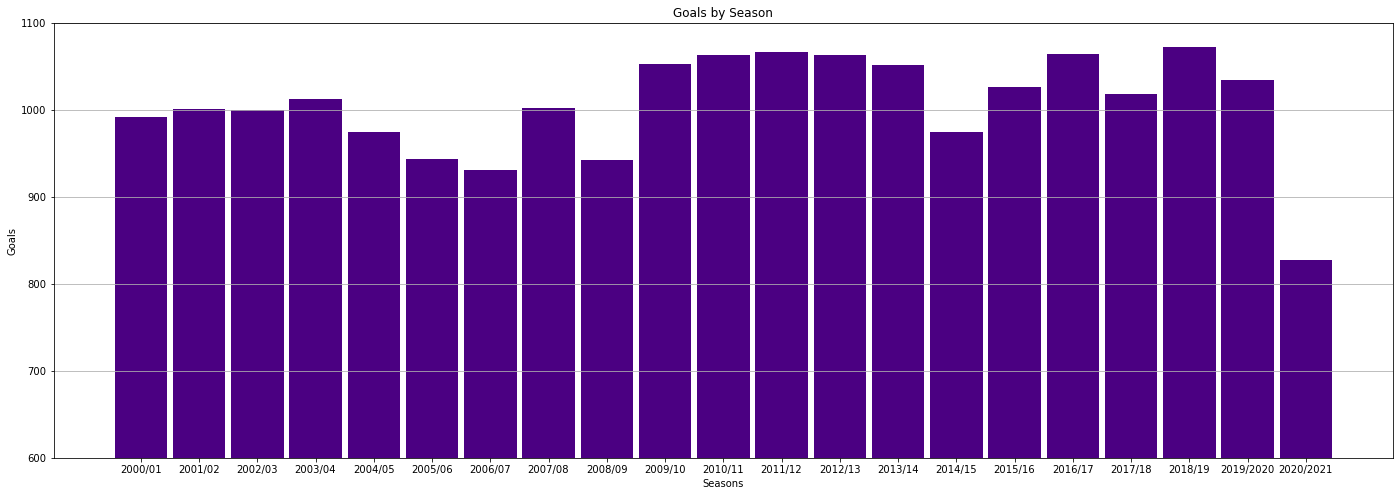

In [34]:
r = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19, 20]

names = ('2000/01','2001/02','2002/03','2003/04','2004/05','2005/06','2006/07','2007/08','2008/09',
         '2009/10','2010/11','2011/12','2012/13','2013/14','2014/15','2015/16','2016/17','2017/18','2018/19', '2019/2020', '2020/2021')

column1 = season['Total Goals']

# bar width
barWidth = 0.9

# Goals bar
plt.bar(r, column1, color='indigo', width=barWidth)

# Axis
plt.xticks(r, names)
plt.xlabel("Seasons")
plt.ylabel("Goals")
plt.title("Goals by Season")
plt.ylim(600, 1100)

# Horizontal gridlines
axes = plt.gca()
axes.yaxis.grid()

# Chart size
plt.rcParams["figure.figsize"] = [24,16]
 
# Show Chart
plt.show()

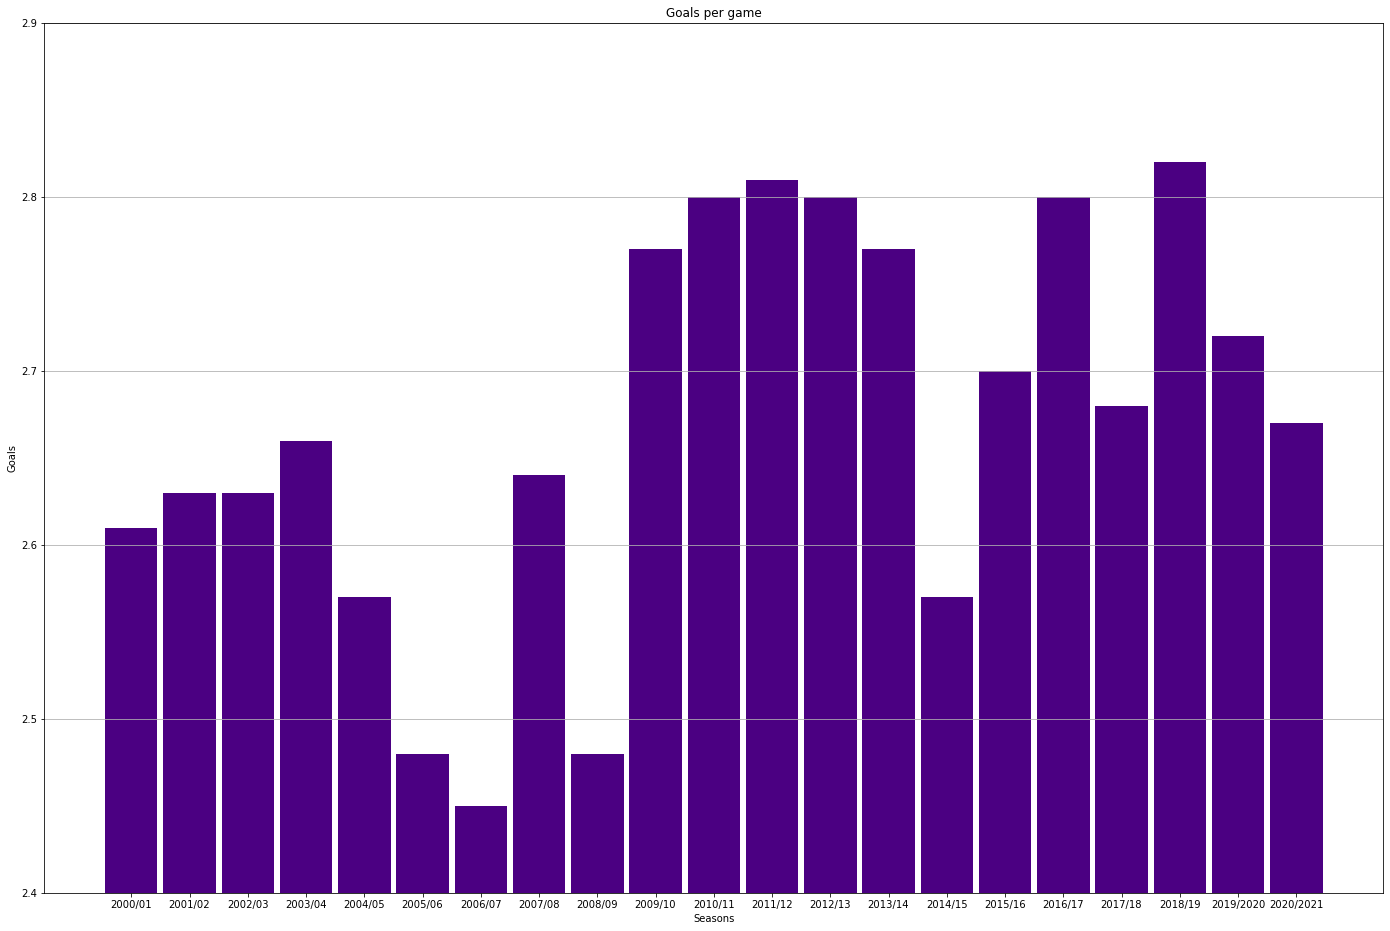

In [35]:
column1 = season['Goals per game']

# bar width
barWidth = 0.9

# Goals bar
plt.bar(r, column1, color='indigo', width=barWidth)

# Axis
plt.xticks(r, names)
plt.xlabel("Seasons")
plt.ylabel("Goals")
plt.title("Goals per game")
plt.ylim(2.4, 2.9)

# Horizontal gridlines
axes = plt.gca()
axes.yaxis.grid()

# Chart size
plt.rcParams["figure.figsize"] = [24,8]
 
# Show Chart
plt.show()

In [37]:
home = df.copy()

home_games = df.groupby('HomeTeam')['HomeTeam'].count()
home_games = pd.DataFrame(home_games)
home_games.columns = ['Games']
home_games.reset_index(level=0, inplace=True)

home_games1 = df.groupby('HomeTeam')['FTHG'].sum()
home_games1 = pd.DataFrame(home_games1)
home_games1.columns = ['Goals Scored']
home_games1.reset_index(level=0, inplace=True)

home_games2 = df.groupby('HomeTeam')['FTAG'].sum()
home_games2 = pd.DataFrame(home_games2)
home_games2.columns = ['Goals Against']
home_games2.reset_index(level=0, inplace=True)

home['trailer'] = np.where((home['HomeTeam'] == home['Final Winner'])&(home['Comeback']== 1),1, 0)
home_games3 = home.groupby('HomeTeam')['trailer'].sum()
home_games3 = pd.DataFrame(home_games3)
home_games3.columns = ['Comeback']
home_games3.reset_index(level=0, inplace=True)

home['HomeTeam'] = home['HomeTeam'].astype('category')
home_games4 = home[home['Final Winner'] == home['HomeTeam']].groupby(['HomeTeam']).size().reset_index(name='Wins')

home_games5 = home[home['Final Winner'] == home['AwayTeam']].groupby(['HomeTeam']).size().reset_index(name='Loss')

home_games6 = home[home['Final Winner'] == 'Draw'].groupby(['HomeTeam']).size().reset_index(name='Draws')

home_games = home_games.merge(home_games1, how='left', on='HomeTeam')
home_games = home_games.merge(home_games2, how='left', on='HomeTeam')
home_games = home_games.merge(home_games3, how='left', on='HomeTeam')
home_games = home_games.merge(home_games4, how='left', on='HomeTeam')
home_games = home_games.merge(home_games5, how='left', on='HomeTeam')
home_games = home_games.merge(home_games6, how='left', on='HomeTeam')

home_games['Goals scored per game'] = round(home_games['Goals Scored']/home_games['Games'],2)

home_games['Goals against per game'] = round(home_games['Goals Against']/home_games['Games'],2)

home_games['% Wins'] = 100*round(home_games['Wins']/home_games['Games'],3)

home_games['% Loss'] = 100*round(home_games['Loss']/home_games['Games'],3)

home_games['% Draws'] = 100*round(home_games['Draws']/home_games['Games'],3)

home_games['% Points Performance'] = 100*round((3*home_games['Wins']+home_games['Draws'])/(3*home_games['Games']),3)

home_games.head()

,HomeTeam,Games,Goals Scored,Goals Against,Comeback,Wins,Loss,Draws,Goals scored per game,Goals against per game,% Wins,% Loss,% Draws,% Points Performance
0,Arsenal,395,851,347,17,266,46,83,2.15,0.88,67.3,11.6,21.0,74.3
1,Aston Villa,337,422,390,7,125,111,101,1.25,1.16,37.1,32.9,30.0,47.1
2,Birmingham,133,162,140,4,50,37,46,1.22,1.05,37.6,27.8,34.6,49.1
3,Blackburn,209,289,239,4,86,64,59,1.38,1.14,41.1,30.6,28.2,50.6
4,Blackpool,19,30,37,0,5,9,5,1.58,1.95,26.3,47.4,26.3,35.1
